## Import Libraries and Training Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
df=pd.read_csv(r'C:\Users\Mahaveer\Downloads\Datasets\train_titanic.csv')

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Data Wrangling

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [8]:
df.Ticket

0             A/5 21171
1              PC 17599
2      STON/O2. 3101282
3                113803
4                373450
             ...       
886              211536
887              112053
888          W./C. 6607
889              111369
890              370376
Name: Ticket, Length: 891, dtype: object

In [9]:
df.iloc[0:3,:]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [10]:
df.sort_values(['Age','Fare'],ascending=[1,0])

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
803,804,1,3,"Thomas, Master. Assad Alexander",male,0.42,0,1,2625,8.5167,NaN,C
755,756,1,2,"Hamalainen, Master. Viljo",male,0.67,1,1,250649,14.5000,NaN,S
469,470,1,3,"Baclini, Miss. Helene Barbara",female,0.75,2,1,2666,19.2583,NaN,C
644,645,1,3,"Baclini, Miss. Eugenie",female,0.75,2,1,2666,19.2583,NaN,C
78,79,1,2,"Caldwell, Master. Alden Gates",male,0.83,0,2,248738,29.0000,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
481,482,0,2,"Frost, Mr. Anthony Wood ""Archie""",male,NaN,0,0,239854,0.0000,NaN,S
633,634,0,1,"Parr, Mr. William Henry Marsh",male,NaN,0,0,112052,0.0000,NaN,S
674,675,0,2,"Watson, Mr. Ennis Hastings",male,NaN,0,0,239856,0.0000,NaN,S
732,733,0,2,"Knight, Mr. Robert J",male,NaN,0,0,239855,0.0000,NaN,S


In [11]:
df['Age'].max()

80.0

In [12]:
df=df.drop(['Cabin','Name','Ticket','PassengerId'],axis=1)

In [13]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [14]:
df['Fmembers']= df.iloc[:,4:6].sum(axis=1)

In [15]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Fmembers
0,0,3,male,22.0,1,0,7.2500,S,1
1,1,1,female,38.0,1,0,71.2833,C,1
2,1,3,female,26.0,0,0,7.9250,S,0
3,1,1,female,35.0,1,0,53.1000,S,1
4,0,3,male,35.0,0,0,8.0500,S,0


In [16]:
df=df.drop(['SibSp','Parch'],axis=1)

In [17]:
df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Fmembers
0,0,3,male,22.0,7.2500,S,1
1,1,1,female,38.0,71.2833,C,1
2,1,3,female,26.0,7.9250,S,0
3,1,1,female,35.0,53.1000,S,1
4,0,3,male,35.0,8.0500,S,0


In [18]:
df.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
Fare          0
Embarked      2
Fmembers      0
dtype: int64

In [19]:
df.loc[(df['Pclass']==1)&(df['Fare']>= 500)]

,Survived,Pclass,Sex,Age,Fare,Embarked,Fmembers
258,1,1,female,35.0,512.3292,C,0
679,1,1,male,36.0,512.3292,C,1
737,1,1,male,35.0,512.3292,C,0


## Data Visualization

<AxesSubplot:>

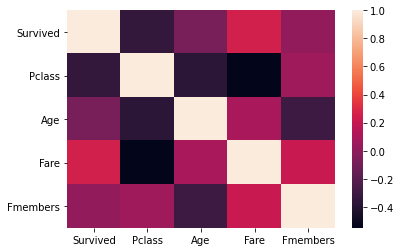

In [20]:
sns.heatmap(df.corr())

<AxesSubplot:>

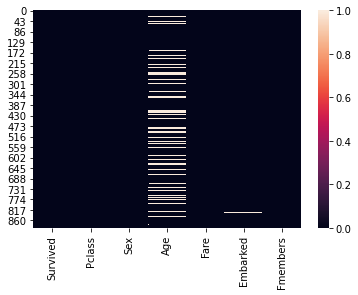

In [21]:
sns.heatmap(df.isnull())

In [22]:
df.Embarked.unique()

array(['S', 'C', 'Q', nan], dtype=object)

### Missing Value Treatment

In [23]:
df['Embarked']=df.Embarked.fillna(df['Embarked'].mode()[0])

In [24]:
df['Age']=df.Age.fillna(df['Age'].mean())

In [25]:
df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
Fare        0
Embarked    0
Fmembers    0
dtype: int64

In [26]:
df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Fmembers
0,0,3,male,22.0,7.2500,S,1
1,1,1,female,38.0,71.2833,C,1
2,1,3,female,26.0,7.9250,S,0
3,1,1,female,35.0,53.1000,S,1
4,0,3,male,35.0,8.0500,S,0


In [27]:
df.Survived.groupby(df['Pclass']).mean()

Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64

<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

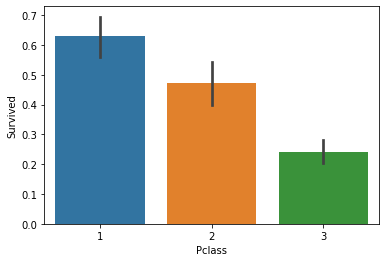

In [28]:
sns.barplot(x='Pclass',y='Survived',data=df)

<AxesSubplot:xlabel='Sex', ylabel='Survived'>

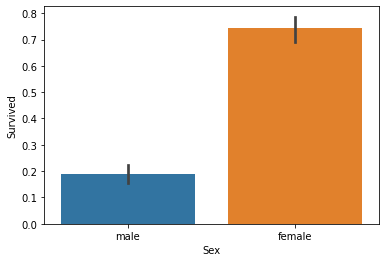

In [29]:
sns.barplot(x='Sex',y='Survived',data=df)

<AxesSubplot:xlabel='Embarked', ylabel='Survived'>

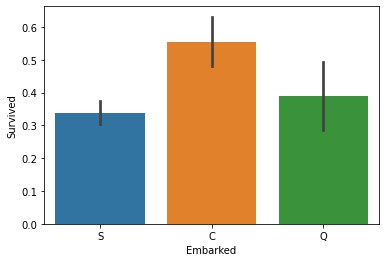

In [30]:
sns.barplot(x='Embarked',y='Survived',data=df)

<AxesSubplot:xlabel='Fmembers', ylabel='Survived'>

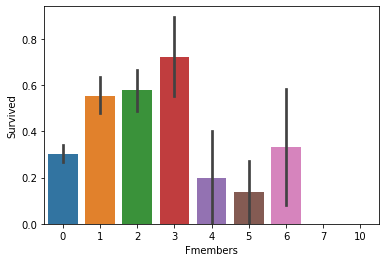

In [31]:
sns.barplot(x='Fmembers',y='Survived',data=df)

<AxesSubplot:xlabel='Survived', ylabel='Age'>

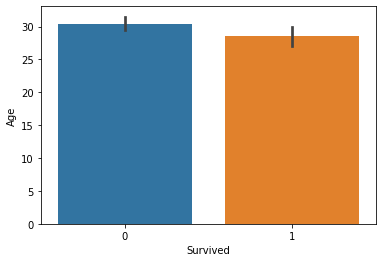

In [32]:
sns.barplot(y='Age',x='Survived',data=df)

<AxesSubplot:xlabel='Age'>

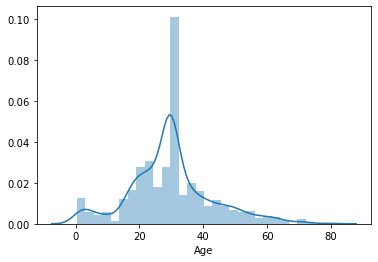

In [33]:
sns.distplot(df['Age'])

<AxesSubplot:xlabel='Survived', ylabel='Age'>

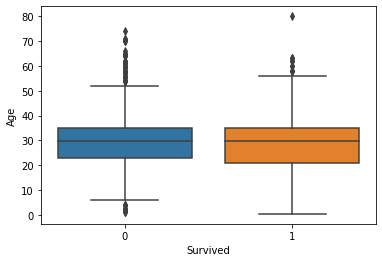

In [34]:
sns.boxplot('Survived','Age',data=df)

<AxesSubplot:xlabel='Fare'>

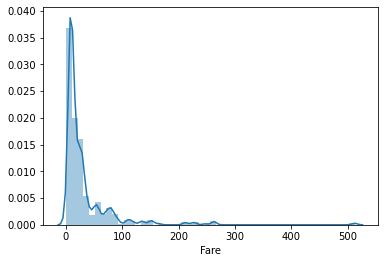

In [35]:
sns.distplot(df['Fare'])

## Training Machine Learning Model

In [36]:
df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Fmembers
0,0,3,male,22.0,7.2500,S,1
1,1,1,female,38.0,71.2833,C,1
2,1,3,female,26.0,7.9250,S,0
3,1,1,female,35.0,53.1000,S,1
4,0,3,male,35.0,8.0500,S,0


In [37]:
df['Embarked']=df.Embarked.replace( {'S': 0, 'Q': 1, 'C': 2})

In [38]:
data=pd.get_dummies(df,columns=['Sex'])

In [39]:
data.head()

,Survived,Pclass,Age,Fare,Embarked,Fmembers,Sex_female,Sex_male
0,0,3,22.0,7.2500,0,1,0,1
1,1,1,38.0,71.2833,2,1,1,0
2,1,3,26.0,7.9250,0,0,1,0
3,1,1,35.0,53.1000,0,1,1,0
4,0,3,35.0,8.0500,0,0,0,1


In [40]:
data=data.drop(['Sex_female'],axis=1)

In [41]:
data.head()

,Survived,Pclass,Age,Fare,Embarked,Fmembers,Sex_male
0,0,3,22.0,7.2500,0,1,1
1,1,1,38.0,71.2833,2,1,0
2,1,3,26.0,7.9250,0,0,0
3,1,1,35.0,53.1000,0,1,0
4,0,3,35.0,8.0500,0,0,1


### Training model on same dataset

In [42]:
Data_X=data.iloc[:,1:]

In [43]:
Data_X.head()

,Pclass,Age,Fare,Embarked,Fmembers,Sex_male
0,3,22.0,7.2500,0,1,1
1,1,38.0,71.2833,2,1,0
2,3,26.0,7.9250,0,0,0
3,1,35.0,53.1000,0,1,0
4,3,35.0,8.0500,0,0,1


In [44]:
Data_y= data.iloc[:,0]

In [45]:
Data_y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [46]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [47]:
X_train,X_test,y_train,y_test=train_test_split(Data_X,Data_y,random_state=0,test_size=0.2)

In [48]:
clf=RandomForestClassifier()

In [49]:
clf.fit(X_train,y_train)

RandomForestClassifier()

In [50]:
clf.score(X_test,y_test)

0.8435754189944135

### Loading Test dataset and then training model

In [109]:
tdf= pd.read_csv(r'C:\Users\Mahaveer\Downloads\Datasets\test_titanic.csv')

In [110]:
e=tdf['PassengerId'].values

In [111]:
tdf.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [112]:
tdf=tdf.drop(['Cabin','Name','Ticket','PassengerId'],axis=1)

In [113]:
tdf.isnull().sum()

Pclass       0
Sex          0
Age         86
SibSp        0
Parch        0
Fare         1
Embarked     0
dtype: int64

In [114]:

tdf['Fmembers']= tdf.iloc[:,3:5].sum(axis=1)
tdf=tdf.drop(['SibSp','Parch'],axis=1)
tdf['Embarked']=tdf.Embarked.fillna(tdf['Embarked'].mode()[0])
tdf['Fare']=tdf.Fare.fillna(tdf['Fare'].mean())
tdf['Age']=tdf.Age.fillna(tdf['Age'].mean())
tdf['Embarked']=tdf.Embarked.replace( {'S': 0, 'Q': 1, 'C': 2})

In [115]:
data_test=pd.get_dummies(tdf,columns=['Sex'])

In [116]:
data_test=data_test.drop(['Sex_female'],axis=1)

In [117]:
data_test.head()

,Pclass,Age,Fare,Embarked,Fmembers,Sex_male
0,3,34.5,7.8292,1,0,1
1,3,47.0,7.0000,0,1,0
2,2,62.0,9.6875,1,0,1
3,3,27.0,8.6625,0,0,1
4,3,22.0,12.2875,0,2,0


In [118]:
#data_test.Fare.unique()

In [119]:
data_test.Fare.isnull().values.any()

False

In [120]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Age       418 non-null    float64
 2   Fare      418 non-null    float64
 3   Embarked  418 non-null    int64  
 4   Fmembers  418 non-null    int64  
 5   Sex_male  418 non-null    uint8  
dtypes: float64(2), int64(3), uint8(1)
memory usage: 16.9 KB


In [121]:
X_train= Data_X
y_train=Data_y

In [122]:
X_test= data_test

In [123]:
from sklearn.ensemble import RandomForestClassifier

In [124]:
rm=RandomForestClassifier(n_estimators=100).fit(X_train,np.ravel(y_train))

In [125]:
rm_pred=rm.predict(X_test)

In [126]:
f={'PassengerId': e,'Survived':rm_pred }

In [127]:
final=pd.DataFrame(f)


In [128]:
final.groupby('Survived').count()

,PassengerId
Survived,
0,276
1,142


In [129]:
final.to_csv('titanic_submit66.csv',index=False)

After submitting this csv on Kaggle the score obtained of prediction is 0.75598